# Домашнее задание по дисциплине «машинное обучение» 2023 год.
# Екатерина Шмакова, группа 5030103/00301.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from random import choice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Загрузка данных

In [2]:
data = pd.read_json('data.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


Первый столбец — id, имеет целочисленный тип данных.\
Второй столбец — cuisine, имеет строковый тип данных, является переменной, которую мы будем предсказывать.\
Третий столбец — ingredients, имеет тип данных список.\
В данном формате данных не получится обучить модель.

In [4]:
data.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [5]:
data.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

Пропусков в данных нет.

Для того, чтобы можно было обучить модель предлагается сделать One-hot-encoding.\
Сначала можно найти все ингердиенты, которые встречаются в рецептах, затем создать колонки с названиями, которые соответствуют ингредиентам, если ингредиент есть в строке с id рецепта, то поставим в данную ячейку значение 1, в противном случае поставим в ячейку значение 0.

In [6]:
ingredients_unique = []
for i in range(data.shape[0]):
    ingredients_unique.extend(data.loc[i, 'ingredients'])
ingredients_unique = list(set(ingredients_unique))   

In [7]:
len(ingredients_unique)

6714

Получили, что всего 6714 уникальных ингредиентов. Таким образом к нашему dataframe добавим 6714 колонок с нулей.

In [8]:
ingredients_unique = pd.DataFrame(0, index=data.index, columns=ingredients_unique)
ingredients_unique

,one third less sodium chicken broth,boneless beef roast,distilled vinegar,iceberg,raw sugar,chopped fresh sage,dark leafy greens,fresh ginger,pearl couscous,chestnut mushrooms,...,lecithin,shrimp heads,boneless sirloin,taco sauce,picholine,red currant jelly,guacamole,light margarine,sambal olek,lamb neck
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = pd.concat([data, ingredients_unique], axis=1)

In [10]:
data

,id,cuisine,ingredients,one third less sodium chicken broth,boneless beef roast,distilled vinegar,iceberg,raw sugar,chopped fresh sage,dark leafy greens,...,lecithin,shrimp heads,boneless sirloin,taco sauce,picholine,red currant jelly,guacamole,light margarine,sambal olek,lamb neck
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for i, row in enumerate(data['ingredients']):
    for ingredient in row:
        data.loc[i, ingredient] = 1

In [12]:
data

,id,cuisine,ingredients,one third less sodium chicken broth,boneless beef roast,distilled vinegar,iceberg,raw sugar,chopped fresh sage,dark leafy greens,...,lecithin,shrimp heads,boneless sirloin,taco sauce,picholine,red currant jelly,guacamole,light margarine,sambal olek,lamb neck
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.loc[4, 'shallots']

1

In [14]:
data.loc[39770, 'KRAFT Zesty Italian Dressing']

1

In [15]:
data.loc[39770, 'shallots']

0

Также создадим новую колонку с длиной рецепта.

In [16]:
data['recipe_length'] = data.drop(columns=['id', 'cuisine', 'ingredients']).sum(axis=1)

Ещё можно убрать колонки id, ingredients, так как id не несёт никакого информационного смысла, а ingredients был закодирован с помощью One-hot-encoding.

In [17]:
data.drop(columns=['id', 'ingredients'], inplace=True)

One-hot-encoding был выполнен, теперь можно удобно проанализировать таблицу и обучать модель.

In [18]:
data

,cuisine,one third less sodium chicken broth,boneless beef roast,distilled vinegar,iceberg,raw sugar,chopped fresh sage,dark leafy greens,fresh ginger,pearl couscous,...,shrimp heads,boneless sirloin,taco sauce,picholine,red currant jelly,guacamole,light margarine,sambal olek,lamb neck,recipe_length
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39770,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
39771,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39772,chinese,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,21


## Анализ данных

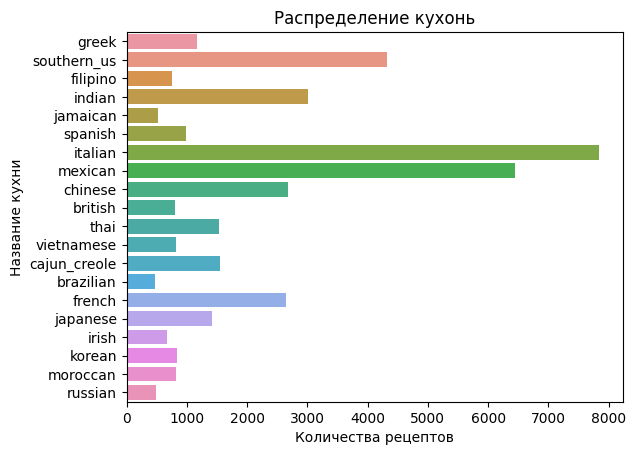

In [19]:
plt.title('Распределение кухонь')
seaborn.countplot(data, y='cuisine')
plt.xlabel('Количества рецептов')
plt.ylabel('Название кухни')
plt.show()

Распределение не является равномерным, это может плохо повлиять на качество модели, так как при обучении желательно, чтобы предсказываемая переменная была распределена равномерно.

In [20]:
data['cuisine'].nunique()

20

Всего видов кухонб 20, значит это будет задача классификации на 20 классов.\
Также построим график среднего количества ингредиентов в рецепте по каждой кухне.

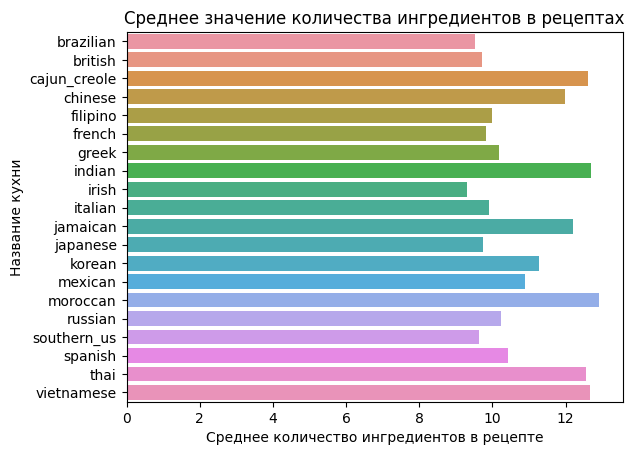

In [21]:
plt.title('Среднее значение количества ингредиентов в рецептах')
seaborn.barplot(data=data.groupby('cuisine').agg({'recipe_length': 'mean'}).reset_index(), x='recipe_length', y='cuisine')
plt.xlabel('Среднее количество ингредиентов в рецепте')
plt.ylabel('Название кухни')
plt.show()

Также посмотрим самые популярные ингредиенты.

In [22]:
popular_ingredients_df = data.drop(columns=['cuisine', 'recipe_length']).sum(axis=0).sort_values(ascending=False).head(25)
popular_ingredients_df = pd.DataFrame({'ingredient': popular_ingredients_df.index, 'count': popular_ingredients_df.values})

In [23]:
popular_ingredients_df

,ingredient,count
0,salt,18048
1,onions,7972
2,olive oil,7971
3,water,7457
4,garlic,7380
5,sugar,6434
6,garlic cloves,6236
7,butter,4847
8,ground black pepper,4784
9,all-purpose flour,4632


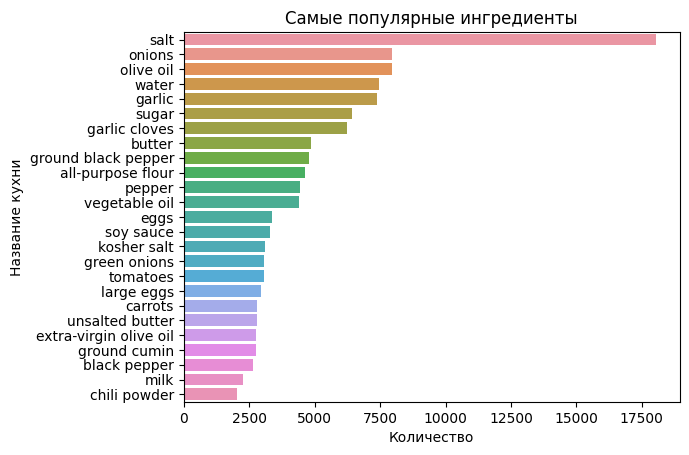

In [24]:
plt.title('Самые популярные ингредиенты')
seaborn.barplot(data=popular_ingredients_df, x='count', y='ingredient')
plt.xlabel('Количество')
plt.ylabel('Название кухни')
plt.show()

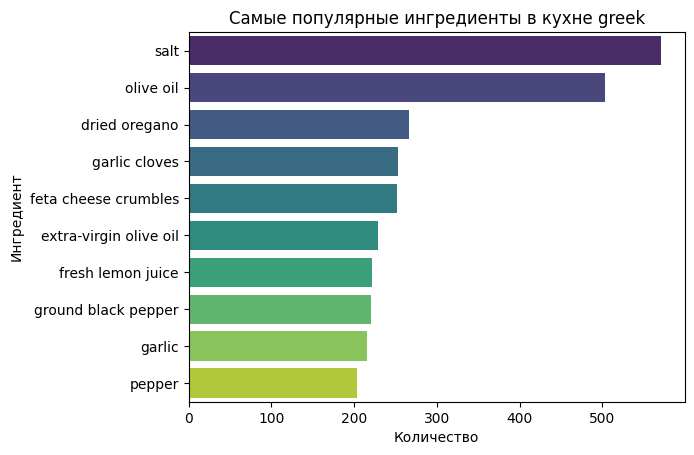

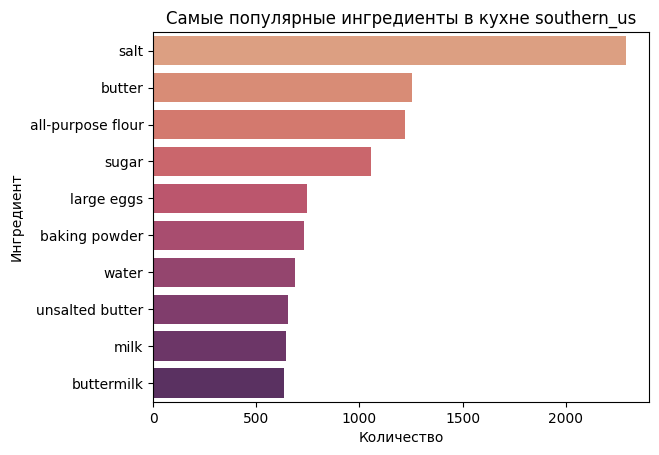

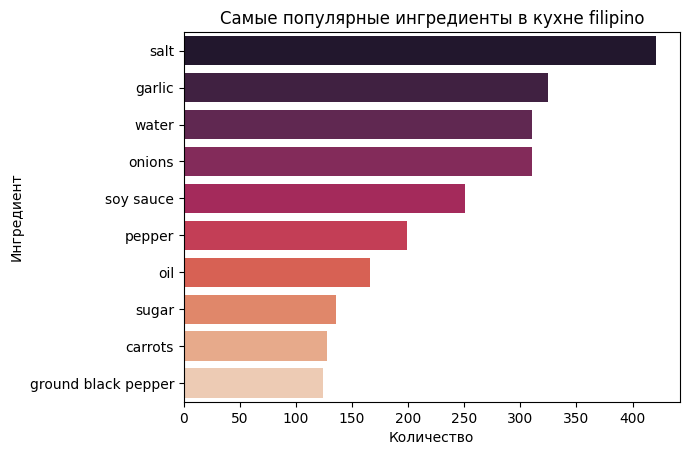

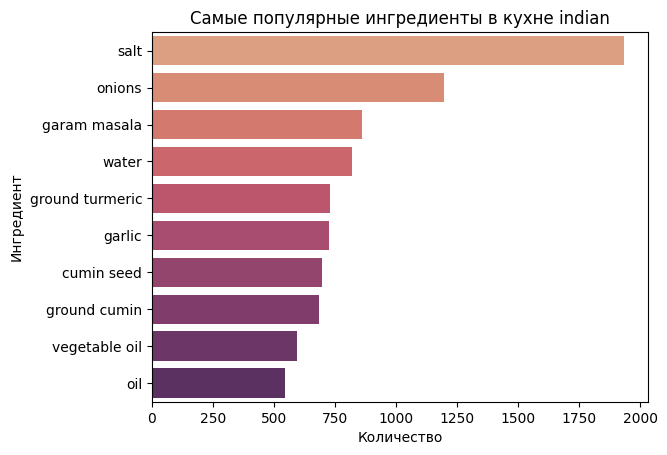

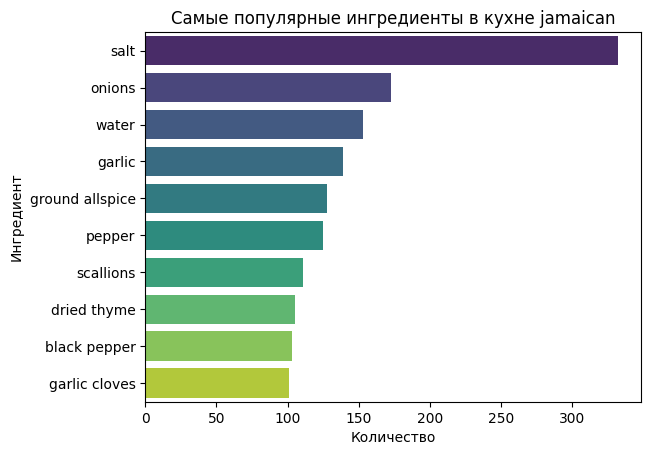

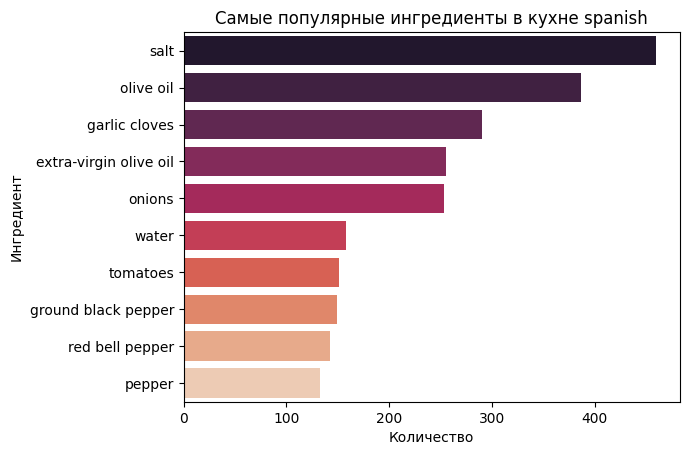

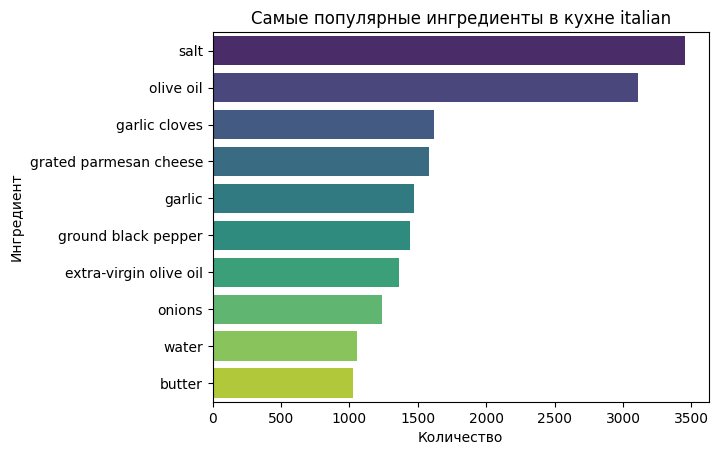

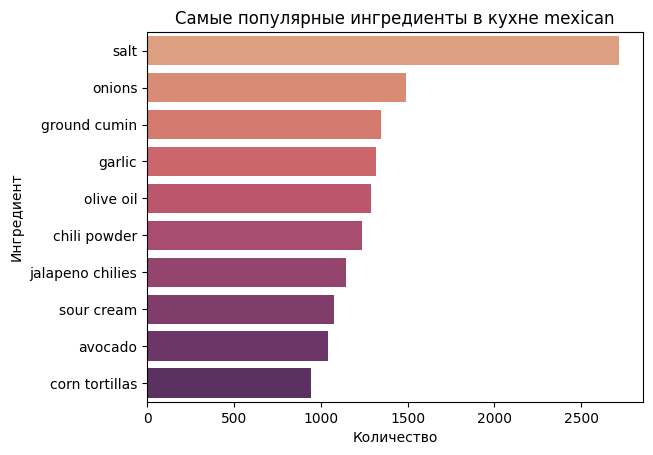

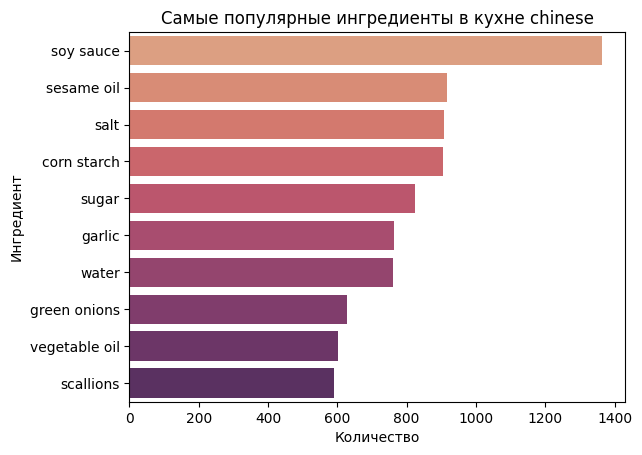

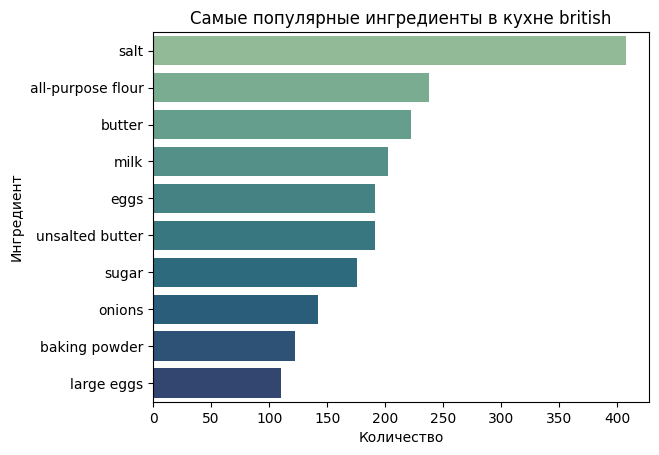

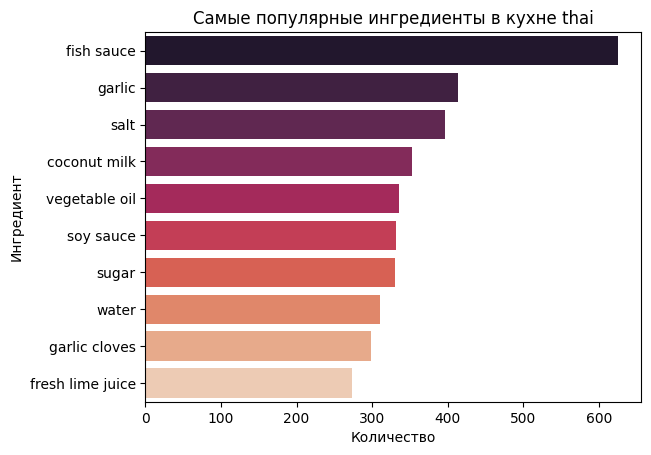

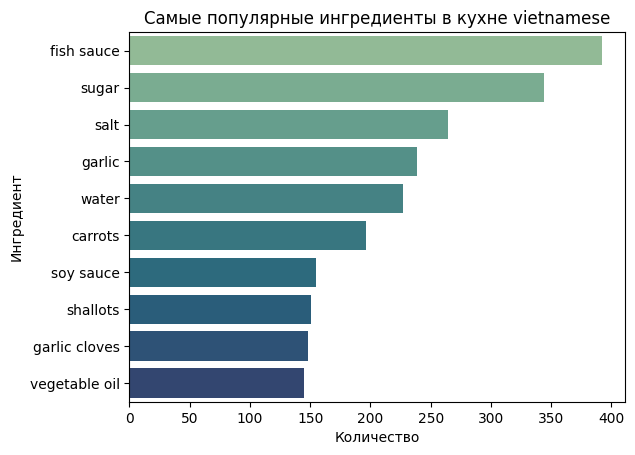

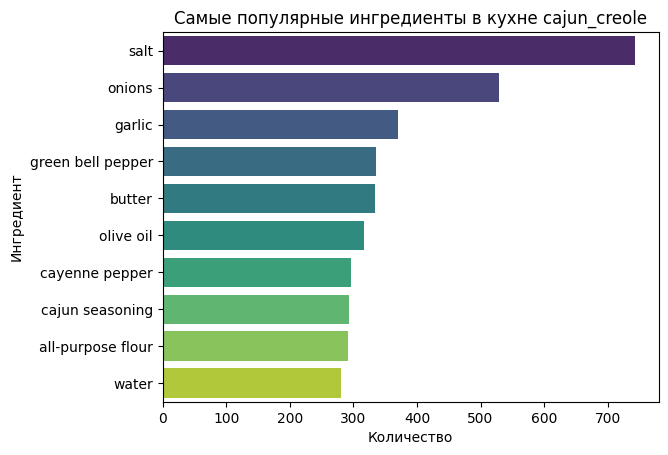

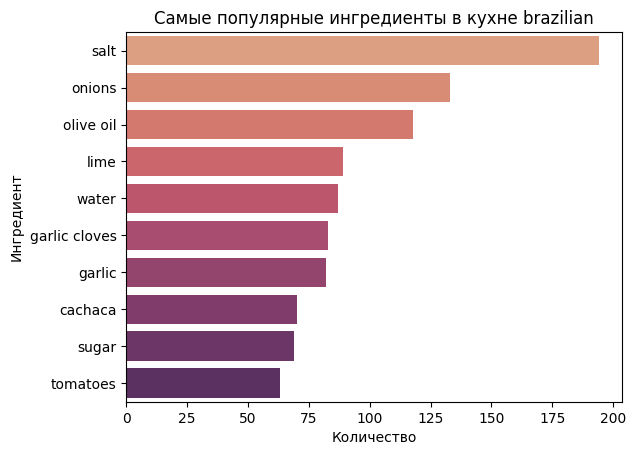

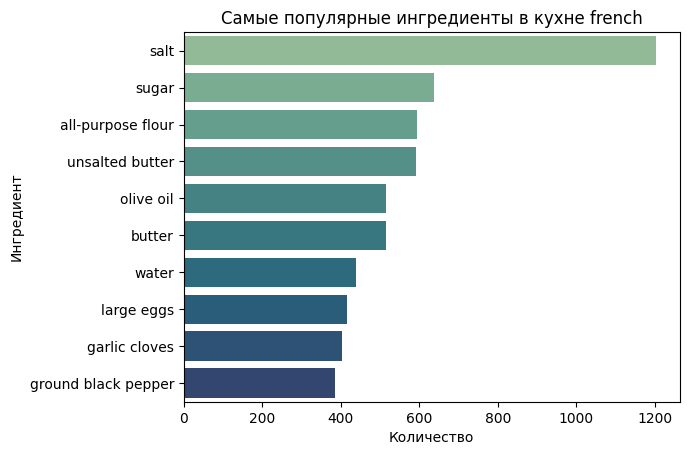

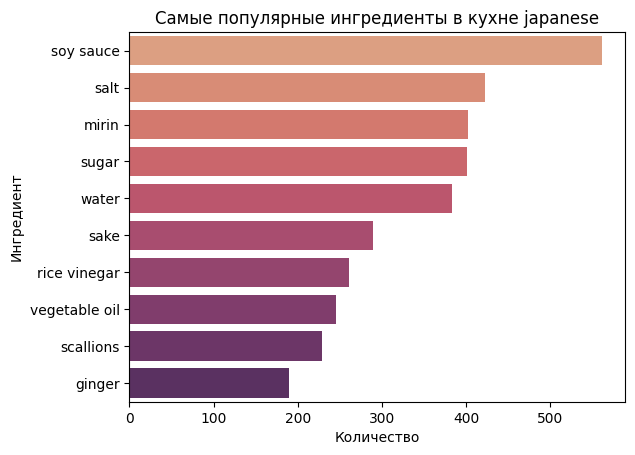

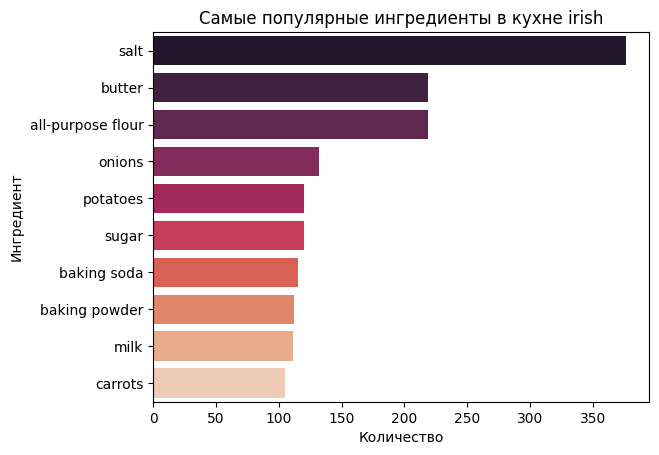

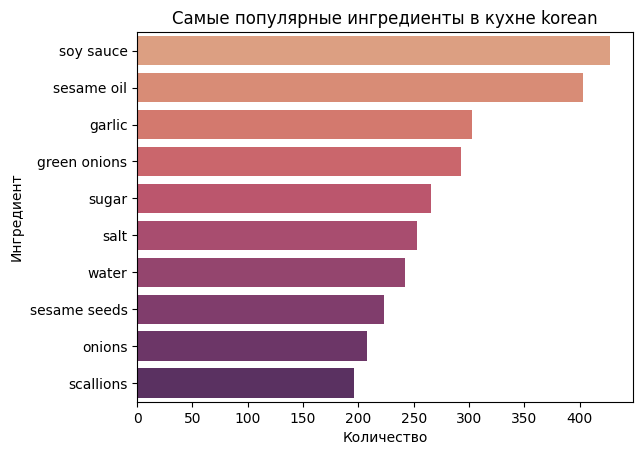

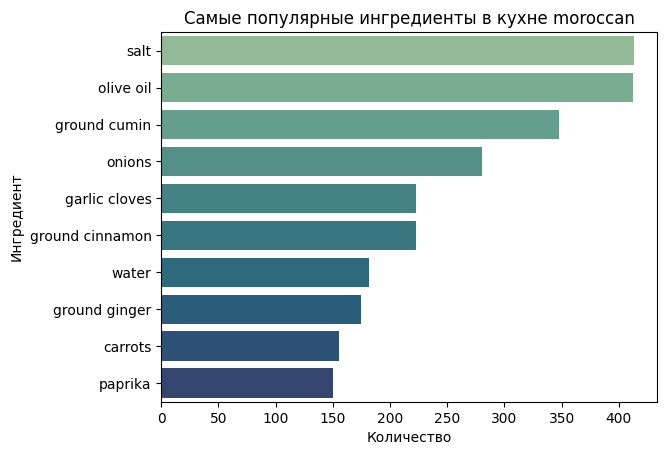

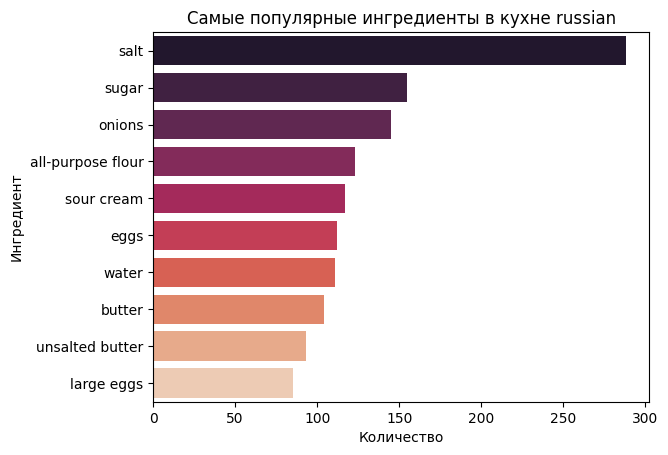

In [25]:
color_themes = ['viridis', 'rocket', 'flare', 'crest']
for cuisine_name in data['cuisine'].unique():
    country_cuisine = data[data['cuisine'] == cuisine_name]\
        .drop(columns=['cuisine', 'recipe_length'])\
        .sum(axis=0)\
        .sort_values(ascending=False)\
        .head(10)
    country_cuisine = pd.DataFrame({'ingredient': country_cuisine.index, 'count': country_cuisine.values})
    plt.title('Самые популярные ингредиенты в кухне {cuisine}'.format(cuisine=cuisine_name))
    seaborn.barplot(data=country_cuisine, x='count', y='ingredient', palette=choice(color_themes))
    plt.xlabel('Количество')
    plt.ylabel('Ингредиент')
    plt.show()

По графикам видно, что в восточных кухнях (японская, корейская, китайская) самый популярный ингредиент — соевый соус. \
В вьетнамской и тайской — рыбный соус. \
В остальных кухнях — соль.

## Разделение данных на обучающую и тестовую выборку.

In [26]:
data

,cuisine,one third less sodium chicken broth,boneless beef roast,distilled vinegar,iceberg,raw sugar,chopped fresh sage,dark leafy greens,fresh ginger,pearl couscous,...,shrimp heads,boneless sirloin,taco sauce,picholine,red currant jelly,guacamole,light margarine,sambal olek,lamb neck,recipe_length
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39770,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
39771,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39772,chinese,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,21


In [27]:
target = data['cuisine']
features = data.drop(columns=['cuisine', 'recipe_length'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42, stratify=target)

In [29]:
y_train.value_counts()

cuisine
italian         5486
mexican         4506
southern_us     3024
indian          2102
chinese         1871
french          1852
cajun_creole    1082
thai            1077
japanese         996
greek            823
spanish          692
korean           581
vietnamese       578
moroccan         575
british          563
filipino         529
irish            467
jamaican         368
russian          342
brazilian        327
Name: count, dtype: int64

In [30]:
y_test.value_counts()

cuisine
italian         2352
mexican         1932
southern_us     1296
indian           901
chinese          802
french           794
cajun_creole     464
thai             462
japanese         427
greek            352
spanish          297
korean           249
vietnamese       247
moroccan         246
british          241
filipino         226
irish            200
jamaican         158
russian          147
brazilian        140
Name: count, dtype: int64

Как видно, попали все классы в обучающую и тестовую выборку.\
Можно приступить к обучению модели.

## Обучение моделей

В лекциях первым алгоритмом классификации был алгоритм логистической регрессии.\
Попробуем его.

In [31]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [32]:
predictions = log_reg.predict(X_test)

In [33]:
log_reg_accuracy = accuracy_score(predictions, y_test)
print('Логистическая регрессия дала результат', log_reg_accuracy, 'на тестовой выборке.')

Логистическая регрессия дала результат 0.771725467191821 на тестовой выборке.


Также в лекциях был был алгоритм бустинга, воспользуемся библиотекой catboost.

In [34]:
boosting_classifier = CatBoostClassifier(iterations=1000)

In [35]:
boosting_classifier.fit(X_train, y_train)

Learning rate set to 0.093757
0:	learn: 2.7472483	total: 463ms	remaining: 7m 42s
1:	learn: 2.6129414	total: 768ms	remaining: 6m 23s
2:	learn: 2.5246702	total: 1.07s	remaining: 5m 55s
3:	learn: 2.4523419	total: 1.37s	remaining: 5m 41s
4:	learn: 2.3726966	total: 1.69s	remaining: 5m 36s
5:	learn: 2.3120760	total: 2s	remaining: 5m 32s
6:	learn: 2.2713811	total: 2.33s	remaining: 5m 30s
7:	learn: 2.2236539	total: 2.65s	remaining: 5m 28s
8:	learn: 2.1955988	total: 2.99s	remaining: 5m 29s
9:	learn: 2.1707153	total: 3.31s	remaining: 5m 28s
10:	learn: 2.1406960	total: 3.64s	remaining: 5m 27s
11:	learn: 2.1159117	total: 3.97s	remaining: 5m 26s
12:	learn: 2.0903449	total: 4.29s	remaining: 5m 25s
13:	learn: 2.0654677	total: 4.62s	remaining: 5m 25s
14:	learn: 2.0461313	total: 4.95s	remaining: 5m 25s
15:	learn: 2.0325779	total: 5.3s	remaining: 5m 25s
16:	learn: 2.0199157	total: 5.64s	remaining: 5m 26s
17:	learn: 2.0015585	total: 6.01s	remaining: 5m 27s
18:	learn: 1.9846528	total: 6.36s	remaining: 5m 

158:	learn: 1.3589305	total: 57s	remaining: 5m 1s
159:	learn: 1.3574695	total: 57.4s	remaining: 5m 1s
160:	learn: 1.3553321	total: 57.7s	remaining: 5m
161:	learn: 1.3531885	total: 58.1s	remaining: 5m
162:	learn: 1.3518943	total: 58.5s	remaining: 5m
163:	learn: 1.3500677	total: 58.9s	remaining: 5m
164:	learn: 1.3483344	total: 59.2s	remaining: 4m 59s
165:	learn: 1.3464907	total: 59.6s	remaining: 4m 59s
166:	learn: 1.3451400	total: 60s	remaining: 4m 59s
167:	learn: 1.3440562	total: 1m	remaining: 4m 58s
168:	learn: 1.3427293	total: 1m	remaining: 4m 58s
169:	learn: 1.3397543	total: 1m 1s	remaining: 4m 58s
170:	learn: 1.3382228	total: 1m 1s	remaining: 4m 57s
171:	learn: 1.3359653	total: 1m 1s	remaining: 4m 57s
172:	learn: 1.3343488	total: 1m 2s	remaining: 4m 57s
173:	learn: 1.3321498	total: 1m 2s	remaining: 4m 57s
174:	learn: 1.3305589	total: 1m 2s	remaining: 4m 56s
175:	learn: 1.3279356	total: 1m 3s	remaining: 4m 56s
176:	learn: 1.3253753	total: 1m 3s	remaining: 4m 56s
177:	learn: 1.3243996

311:	learn: 1.1748110	total: 1m 54s	remaining: 4m 11s
312:	learn: 1.1742304	total: 1m 54s	remaining: 4m 11s
313:	learn: 1.1729438	total: 1m 54s	remaining: 4m 10s
314:	learn: 1.1718042	total: 1m 55s	remaining: 4m 10s
315:	learn: 1.1712698	total: 1m 55s	remaining: 4m 10s
316:	learn: 1.1701071	total: 1m 55s	remaining: 4m 9s
317:	learn: 1.1694327	total: 1m 56s	remaining: 4m 9s
318:	learn: 1.1690128	total: 1m 56s	remaining: 4m 9s
319:	learn: 1.1677732	total: 1m 57s	remaining: 4m 8s
320:	learn: 1.1670587	total: 1m 57s	remaining: 4m 8s
321:	learn: 1.1665714	total: 1m 57s	remaining: 4m 8s
322:	learn: 1.1661539	total: 1m 58s	remaining: 4m 7s
323:	learn: 1.1655556	total: 1m 58s	remaining: 4m 7s
324:	learn: 1.1648454	total: 1m 58s	remaining: 4m 6s
325:	learn: 1.1641523	total: 1m 59s	remaining: 4m 6s
326:	learn: 1.1630429	total: 1m 59s	remaining: 4m 6s
327:	learn: 1.1618444	total: 2m	remaining: 4m 5s
328:	learn: 1.1614303	total: 2m	remaining: 4m 5s
329:	learn: 1.1606449	total: 2m	remaining: 4m 5s


465:	learn: 1.0767320	total: 2m 51s	remaining: 3m 16s
466:	learn: 1.0762531	total: 2m 51s	remaining: 3m 16s
467:	learn: 1.0758545	total: 2m 52s	remaining: 3m 15s
468:	learn: 1.0756415	total: 2m 52s	remaining: 3m 15s
469:	learn: 1.0753975	total: 2m 52s	remaining: 3m 15s
470:	learn: 1.0744876	total: 2m 53s	remaining: 3m 14s
471:	learn: 1.0738071	total: 2m 53s	remaining: 3m 14s
472:	learn: 1.0732872	total: 2m 54s	remaining: 3m 13s
473:	learn: 1.0724485	total: 2m 54s	remaining: 3m 13s
474:	learn: 1.0720130	total: 2m 54s	remaining: 3m 13s
475:	learn: 1.0717322	total: 2m 55s	remaining: 3m 12s
476:	learn: 1.0710375	total: 2m 55s	remaining: 3m 12s
477:	learn: 1.0703743	total: 2m 55s	remaining: 3m 12s
478:	learn: 1.0696478	total: 2m 56s	remaining: 3m 11s
479:	learn: 1.0691918	total: 2m 56s	remaining: 3m 11s
480:	learn: 1.0680647	total: 2m 57s	remaining: 3m 11s
481:	learn: 1.0677510	total: 2m 57s	remaining: 3m 10s
482:	learn: 1.0673143	total: 2m 57s	remaining: 3m 10s
483:	learn: 1.0666716	total:

619:	learn: 1.0143143	total: 3m 49s	remaining: 2m 20s
620:	learn: 1.0140927	total: 3m 50s	remaining: 2m 20s
621:	learn: 1.0139070	total: 3m 50s	remaining: 2m 20s
622:	learn: 1.0135845	total: 3m 50s	remaining: 2m 19s
623:	learn: 1.0133703	total: 3m 51s	remaining: 2m 19s
624:	learn: 1.0132596	total: 3m 51s	remaining: 2m 18s
625:	learn: 1.0130863	total: 3m 51s	remaining: 2m 18s
626:	learn: 1.0121111	total: 3m 52s	remaining: 2m 18s
627:	learn: 1.0118287	total: 3m 52s	remaining: 2m 17s
628:	learn: 1.0115830	total: 3m 53s	remaining: 2m 17s
629:	learn: 1.0110523	total: 3m 53s	remaining: 2m 17s
630:	learn: 1.0108206	total: 3m 53s	remaining: 2m 16s
631:	learn: 1.0105768	total: 3m 54s	remaining: 2m 16s
632:	learn: 1.0100387	total: 3m 54s	remaining: 2m 16s
633:	learn: 1.0097887	total: 3m 54s	remaining: 2m 15s
634:	learn: 1.0097295	total: 3m 55s	remaining: 2m 15s
635:	learn: 1.0094820	total: 3m 55s	remaining: 2m 14s
636:	learn: 1.0092880	total: 3m 56s	remaining: 2m 14s
637:	learn: 1.0090048	total:

773:	learn: 0.9717695	total: 4m 47s	remaining: 1m 23s
774:	learn: 0.9715446	total: 4m 47s	remaining: 1m 23s
775:	learn: 0.9706817	total: 4m 48s	remaining: 1m 23s
776:	learn: 0.9706245	total: 4m 48s	remaining: 1m 22s
777:	learn: 0.9703194	total: 4m 48s	remaining: 1m 22s
778:	learn: 0.9700361	total: 4m 49s	remaining: 1m 22s
779:	learn: 0.9698384	total: 4m 49s	remaining: 1m 21s
780:	learn: 0.9695713	total: 4m 50s	remaining: 1m 21s
781:	learn: 0.9694220	total: 4m 50s	remaining: 1m 20s
782:	learn: 0.9690740	total: 4m 50s	remaining: 1m 20s
783:	learn: 0.9687094	total: 4m 51s	remaining: 1m 20s
784:	learn: 0.9684508	total: 4m 51s	remaining: 1m 19s
785:	learn: 0.9681525	total: 4m 51s	remaining: 1m 19s
786:	learn: 0.9678738	total: 4m 52s	remaining: 1m 19s
787:	learn: 0.9675315	total: 4m 52s	remaining: 1m 18s
788:	learn: 0.9670459	total: 4m 53s	remaining: 1m 18s
789:	learn: 0.9667675	total: 4m 53s	remaining: 1m 17s
790:	learn: 0.9664709	total: 4m 53s	remaining: 1m 17s
791:	learn: 0.9663674	total:

929:	learn: 0.9385444	total: 5m 46s	remaining: 26.1s
930:	learn: 0.9384088	total: 5m 47s	remaining: 25.7s
931:	learn: 0.9379368	total: 5m 47s	remaining: 25.4s
932:	learn: 0.9379187	total: 5m 47s	remaining: 25s
933:	learn: 0.9375911	total: 5m 48s	remaining: 24.6s
934:	learn: 0.9375565	total: 5m 48s	remaining: 24.2s
935:	learn: 0.9372782	total: 5m 49s	remaining: 23.9s
936:	learn: 0.9372366	total: 5m 49s	remaining: 23.5s
937:	learn: 0.9371908	total: 5m 49s	remaining: 23.1s
938:	learn: 0.9371678	total: 5m 50s	remaining: 22.7s
939:	learn: 0.9367952	total: 5m 50s	remaining: 22.4s
940:	learn: 0.9365502	total: 5m 50s	remaining: 22s
941:	learn: 0.9365288	total: 5m 51s	remaining: 21.6s
942:	learn: 0.9364729	total: 5m 51s	remaining: 21.3s
943:	learn: 0.9364227	total: 5m 52s	remaining: 20.9s
944:	learn: 0.9363716	total: 5m 52s	remaining: 20.5s
945:	learn: 0.9363407	total: 5m 52s	remaining: 20.1s
946:	learn: 0.9361096	total: 5m 53s	remaining: 19.8s
947:	learn: 0.9359845	total: 5m 53s	remaining: 19.

In [36]:
predictions = boosting_classifier.predict(X_test)

In [37]:
boosting_accuracy = accuracy_score(predictions, y_test)
print('Градиентный бустинг дал результат', boosting_accuracy, 'на тестовой выборке.')

Градиентный бустинг дал результат 0.7180088829296908 на тестовой выборке.


В лекциях также был метод K-nearest-neighboors.

In [38]:
KNN_classifier = KNeighborsClassifier(n_neighbors=30)
KNN_classifier.fit(X_train.values, y_train)
predictions = KNN_classifier.predict(X_test.values)
KNN_accuracy = accuracy_score(predictions, y_test)

In [39]:
print('Алгоритм K ближайших соседей дал результат', KNN_accuracy, 'на тестовой выборке.')

Алгоритм K ближайших соседей дал результат 0.5042319617866421 на тестовой выборке.


Ещё в лекциях был алгоритм дерева решений.

In [40]:
tree_classifier = DecisionTreeClassifier(random_state=1, max_depth=190)

In [41]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=190, random_state=1)

In [42]:
predictions = tree_classifier.predict(X_test)
tree_accuracy = accuracy_score(predictions, y_test)

In [43]:
print('Алгоритм дерева решений дал результат', tree_accuracy, 'на тестовой выборке.')

Алгоритм дерева решений дал результат 0.600351965138691 на тестовой выборке.


## Выводы

После выгрузки, чтения, обработки данных, были построены 4 модели классификации.\
Наибольшую точность предсказаний дал алгоритм логистической регрессии. Логистическая регрессия дала результат 0.77 на тестовой выборке.\
Второе место получил градиентный бустинг. Градиентный бустинг дал результат 0.72 на тестовой выборке.\
Третье место получил алгоритм дерева решений, который дал результат 0.6 на тестовой выборке.\
И последнее место с худшим результатом получил метод K ближайших соседей с результатом 0.5.
